   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, h

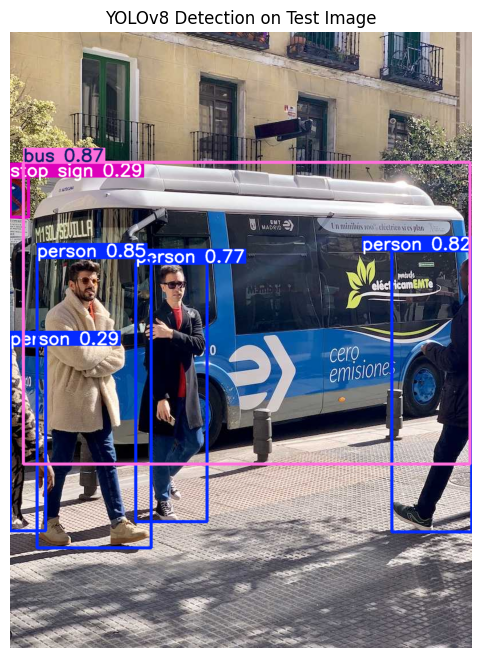

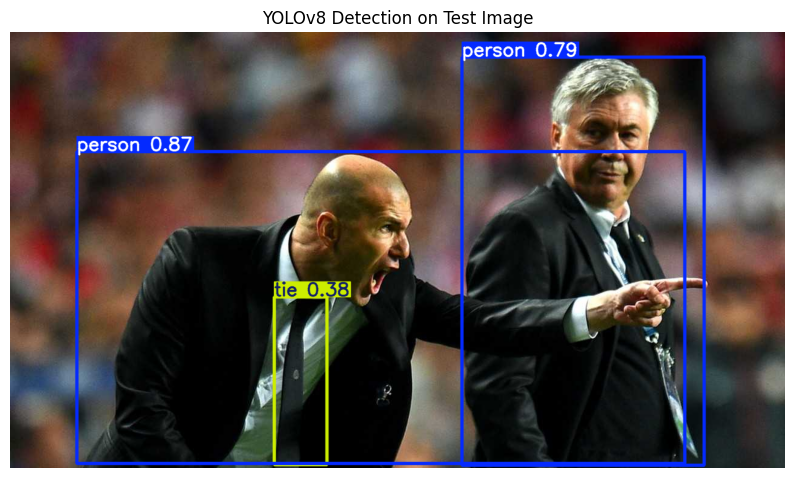

Detected: bus (Confidence: 0.87)
Detected: person (Confidence: 0.85)
Detected: person (Confidence: 0.82)
Detected: person (Confidence: 0.77)
Detected: person (Confidence: 0.29)
Detected: stop sign (Confidence: 0.29)


In [1]:
# Install the necessary libraries
!pip install ultralytics

# Import libraries
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

# Load a pre-trained YOLOv8 model for training
model = YOLO("yolov8n.pt")

# Train the model on a small subset of the COCO dataset for a quick run
results = model.train(data="coco128.yaml", epochs=5, imgsz=640)

print("Training is complete.")

# --- Testing the Trained Model ---

# Locate the path of the best trained model
# This path is relative to the current working directory in Colab
best_model_path = os.path.join(model.trainer.save_dir, 'weights', 'best.pt')

# Load the trained model
# This new model instance contains the weights learned during training
trained_model = YOLO(best_model_path)

# Download a sample image for testing from a URL
!wget https://ultralytics.com/images/bus.jpg -O test_image.jpg

# Load the test image using OpenCV
test_img_path = "/bus.avif"
test_img = cv2.imread(test_img_path)

# Run detection on the test image
# The trained_model is now used for inference instead of the initial model
inference_results = trained_model(test_img)

# Visualize the detection results
for r in inference_results:
    annotated_img = r.plot()  # Draw bounding boxes and labels
    plt.figure(figsize=(10, 8))
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title("YOLOv8 Detection on Test Image")
    plt.axis("off")
    plt.show()

# Print the detected classes and confidences
for box in inference_results[0].boxes:
    cls = int(box.cls[0])
    conf = float(box.conf[0])
    # The names of the classes are from the original coco128 dataset
    print(f"Detected: {trained_model.names[cls]} (Confidence: {conf:.2f})")